### MLNE: Multi-layer Node Embeddings


For a given a set of matrices $\mathbf{M}:=\{M_l\}_{1\leq l \leq L}$, the objective function is defined by

$$
f(\mathbf{A}_1,\ldots, \mathbf{A}_L, \mathbf{B}) = \sum_{l=1}^{L}|| M_l - \mathbf{A}_l\mathbf{B} ||  + \sum_{l=1}^L\alpha|| \mathbf{A}_l ||^2 + + \beta|| \mathbf{B} ||^2
$$

In [6]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np
from examples.mf_reg_distinct_a_common_b import *

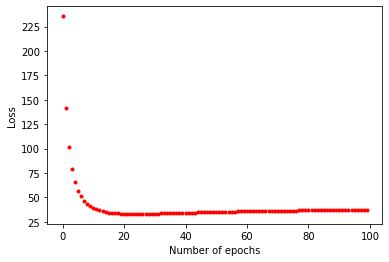

Total Loss: 37.19437026977539


In [7]:
### Definition of the model parameters ###
seed = 500 # seed
num = 16 # number of elements
L = 2  # number of layers
dim = 16 # embedding size
numOfEpochs = 100 # number of epocs
learning_rate = 1e-1 # learning rate
l2_reg_coeff = 1e-2 # regularization term coefficient for l2
##########################################

# Set the seed value
np.random.seed(seed)

# Construct the input matrix
#M = np.random.randint(low=0, high=2, size=(L, num, num))
M = np.zeros(shape=(L, num, num))
for i in range(num):
  for j in range(i+1, num):
    M[0, i, j] = 1
    M[1, j, i] = 1


# Convert the input matrix to tensor
M = torch.from_numpy(M)

# Define the model, loss function and the optimizer
model = MatrixFactorization(num, dim=dim, numOfLayers=L)
loss_func = torch.nn.MSELoss()
#optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate, weight_decay=l2_reg_coeff)
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate, weight_decay=l2_reg_coeff)


# Train the model
lossList = train(M, numOfEpochs, model, optimizer, loss_func)

# Plot the learning curve
plt.figure()
plt.plot(range(numOfEpochs), lossList, 'r.')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

idxList = torch.tensor([ [l, i, j] for l in range(M.shape[0]) for i in range(M.shape[1]) for j in range(M.shape[2]) ])
currentLoss = computeCurrentLoss(loss_func, M, idxList, model)
print(f"Total Loss: {currentLoss}")

# Print the reconstructed matrix
modelParams = list(model.parameters())
A_pred = modelParams[0].detach().numpy()
B_pred = modelParams[1].detach().numpy()

C = np.dot(A_pred, B_pred.T)
#print(C)

In [5]:
# Plot the input matrix
plt.figure()

for l in range(L):
  plt.subplot(2, L, l+1)
  plt.imshow(M[l, :, :], cmap='gray')
  plt.ylabel('Original') if l == 0

for l in range(L):
  plt.subplot(2, L, L+l+1)
  plt.imshow(C[num*l:num*(l+1), :], cmap='gray')
  plt.ylabel('Reconstructed') if l == 0
plt.show()

SyntaxError: invalid syntax (<ipython-input-5-7eb5f98fdecc>, line 7)